In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
data = pd.read_csv("mall_customers.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

FileNotFoundError: ignored

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Initialize the K-means model
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Get the labels for each data point
labels = kmeans.labels_

# Create an empty list to store the distances
distances = []

In [ ]:
print(centroids)

[[ 0.99158305  1.23950275]
 [-0.20091257 -0.02645617]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]
 [ 1.05500302 -1.28443907]]


In [ ]:
# Calculate the distance between each data point and the centroid
for i in range(len(X)):
    distances.append(np.linalg.norm(X[i]-centroids[labels[i]]))

# Calculate the weights for each data point
weights = [1/dist for dist in distances]

# Fit the weighted K-means model
kmeans.fit(X, sample_weight=weights)

KMeans(n_clusters=5)

In [ ]:
# Get the new centroids
new_centroids = kmeans.cluster_centers_

# Get the new labels for each data point
new_labels = kmeans.labels_

In [ ]:
print(new_centroids)

[[ 0.90176006  1.25495122]
 [ 0.98640635 -1.30568775]
 [-0.19993446 -0.01909275]
 [-1.34332581  1.10317534]
 [-1.29814616 -1.15470104]]


In [ ]:
# Calculate the new distances
new_distances = []
for i in range(len(X)):
    new_distances.append(np.linalg.norm(X[i]-new_centroids[new_labels[i]]))
# Find the data point with the maximum distance
max_dist = max(new_distances)

# Set lambda value
lambda_val = 0.1


In [ ]:
# Identify the clusters within the radius of range of max distance - lambda value
clusters_in_range = []
for i in range(len(X)):
    if new_distances[i] <= max_dist - lambda_val:
        clusters_in_range.append(X[i])
        print(clusters_in_range)

[array([-1.73899919, -0.43480148])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407]), array([-1.70082976, -1.71591298])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407]), array([-1.70082976, -1.71591298]), array([-1.70082976,  1.04041783])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407]), array([-1.70082976, -1.71591298]), array([-1.70082976,  1.04041783]), array([-1.66266033, -0.39597992])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407]), array([-1.70082976, -1.71591298]), array([-1.70082976,  1.04041783]), array([-1.66266033, -0.39597992]), array([-1.66266033,  1.00159627])]
[array([-1.73899919, -0.43480148]), array([-1.73899919,  1.19570407]), array([-1.70082976, -1.71591298]), array([-1.70082976,  1.04041783]), array([-1.66266033, -0.39597992]), array([-1.66266033,  1.00159627]), array([-1.62449091, -1.71591298])]
[array([-1.73

In [ ]:
# Fit the K-means model to the clusters within the range
final_kmeans = KMeans(n_clusters=5)
final_kmeans.fit(clusters_in_range)

# Get the final labels
final_labels = final_kmeans.labels_
final_labels = final_kmeans.labels_.tolist()

print(final_labels)


[3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4]


In [ ]:
final_labels = final_kmeans.labels_
X = X[np.where(final_labels != -1)[0]]
final_labels = final_labels[np.where(final_labels != -1)[0]]


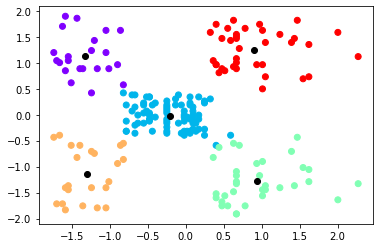

In [ ]:
# Plot the clusters
plt.scatter(X[:,0], X[:,1], c=final_labels, cmap='rainbow')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], color='black')
plt.show()

In [ ]:
accuracy = sum([1 for i in range(len(X)) if labels[i] == final_labels[i]]) / len(X)
print(accuracy)

0.5255102040816326


In [ ]:
# # Calculate the accuracy
# accuracy = len(np.where(labels == final_labels)) / len(X)
# print(accuracy)

0.00510204081632653


C:\Users\Saurabh\AppData\Local\Temp\ipykernel_5240\3158778993.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = len(np.where(labels == final_labels)) / len(X)


In [ ]:

from sklearn.metrics import silhouette_score

score = silhouette_score(X, final_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5673970194294332
